In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [66]:
# Charger les données
df = pd.read_excel('Dataset.xls')

# Partie 1

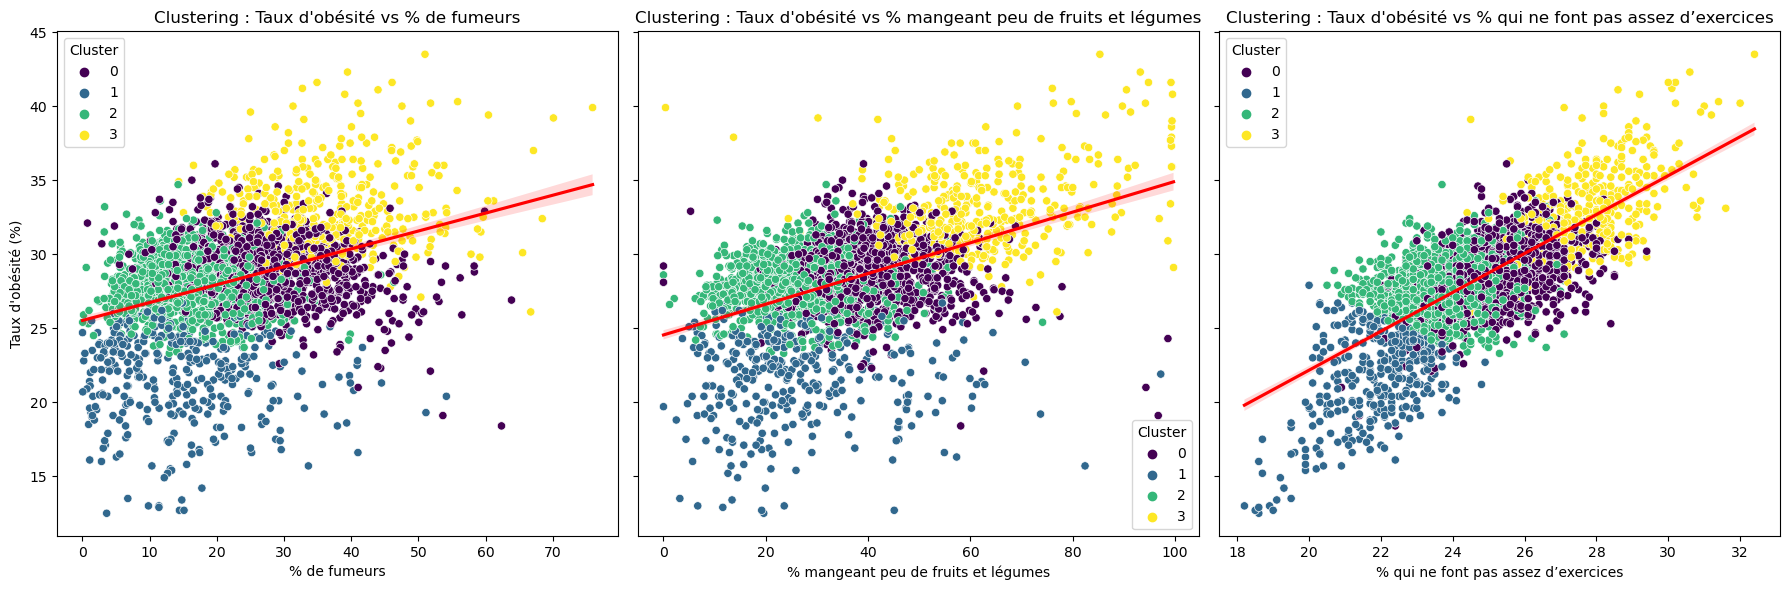

In [ ]:
# Filtrage des colonnes nécessaires
cols_needed = ['Adult obesity rate', '% smokers', '% eating few fruits and vegetables', '% who do not exercise']
data = df[cols_needed].dropna()

# Étape 1 : Clustering basé sur toutes les colonnes
# Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Application de K-Means avec 4 clusters (ajustable entre 3 et 6 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Ajout des clusters au DataFrame
data['Cluster'] = clusters

# Étape 2 : Visualisations avec clustering et courbes de tendance
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Graphe 1 : Obésité vs Fumeurs
sns.scatterplot(data=data, x='% smokers', y='Adult obesity rate', hue='Cluster', palette='viridis', ax=axes[0])
sns.regplot(data=data, x='% smokers', y='Adult obesity rate', scatter=False, color='red', ax=axes[0])
axes[0].set_title('Clustering : Taux d\'obésité vs % de fumeurs')
axes[0].set_xlabel('% de fumeurs')
axes[0].set_ylabel('Taux d\'obésité (%)')

# Graphe 2 : Obésité vs Peu de fruits et légumes
sns.scatterplot(data=data, x='% eating few fruits and vegetables', y='Adult obesity rate', hue='Cluster', palette='viridis', ax=axes[1])
sns.regplot(data=data, x='% eating few fruits and vegetables', y='Adult obesity rate', scatter=False, color='red', ax=axes[1])
axes[1].set_title('Clustering : Taux d\'obésité vs % mangeant peu de fruits et légumes')
axes[1].set_xlabel('% mangeant peu de fruits et légumes')

# Graphe 3 : Obésité vs Manque d’exercice
sns.scatterplot(data=data, x='% who do not exercise', y='Adult obesity rate', hue='Cluster', palette='viridis', ax=axes[2])
sns.regplot(data=data, x='% who do not exercise', y='Adult obesity rate', scatter=False, color='red', ax=axes[2])
axes[2].set_title('Clustering : Taux d\'obésité vs % qui ne font pas assez d’exercices')
axes[2].set_xlabel('% qui ne font pas assez d’exercices')

plt.tight_layout()
plt.show()

# Partie2

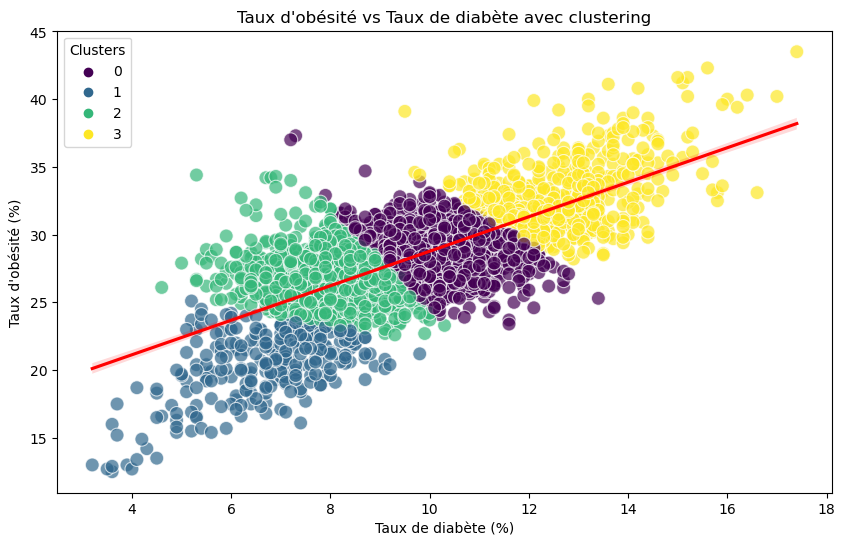

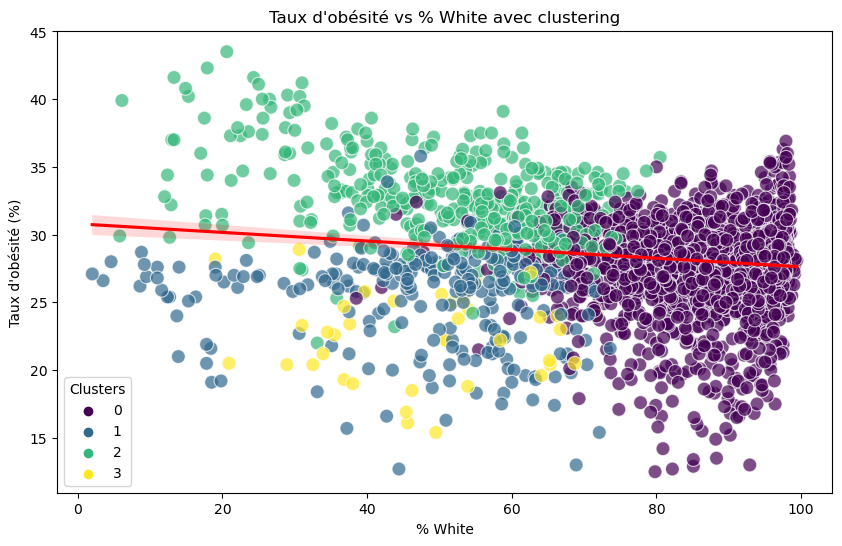

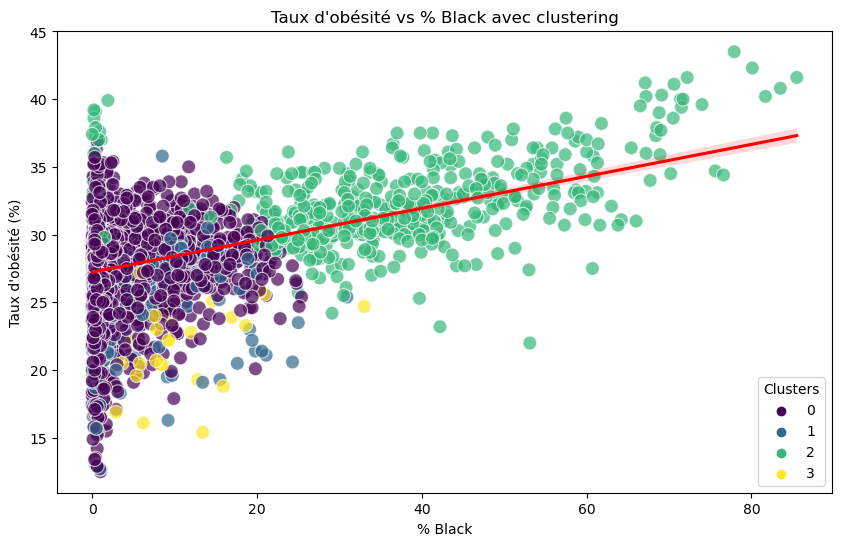

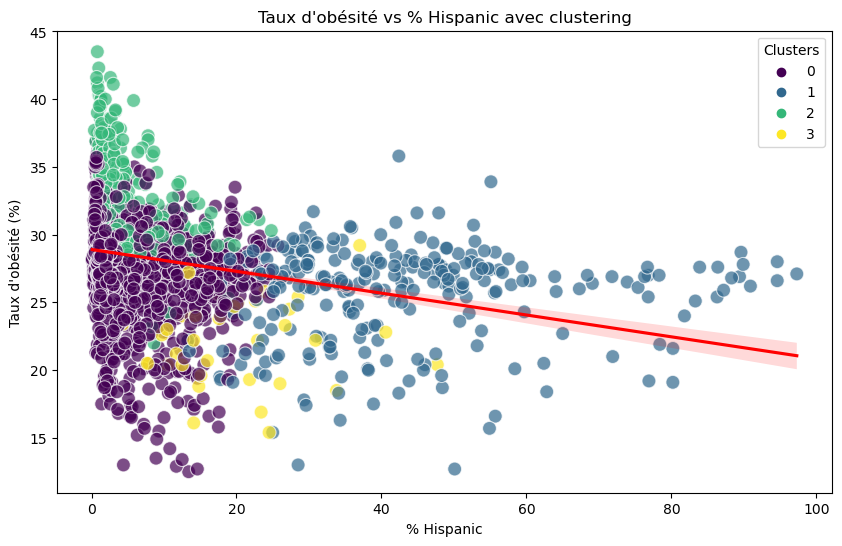

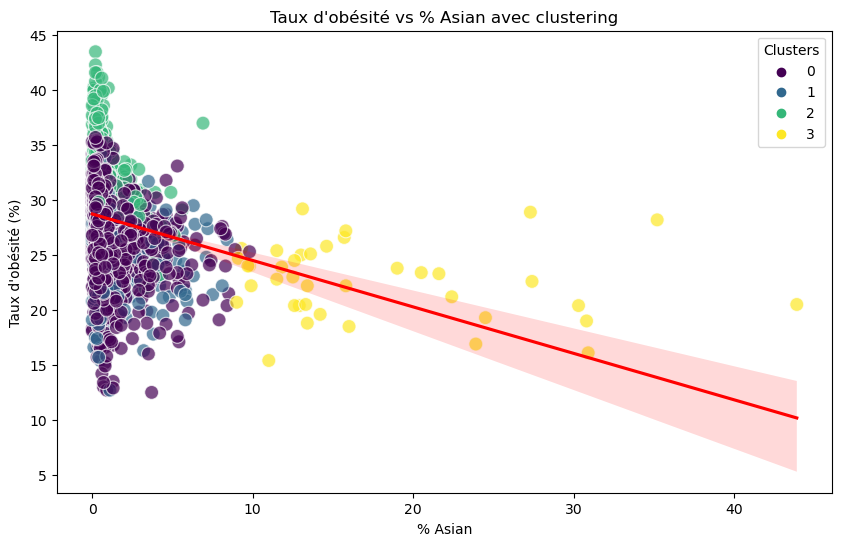

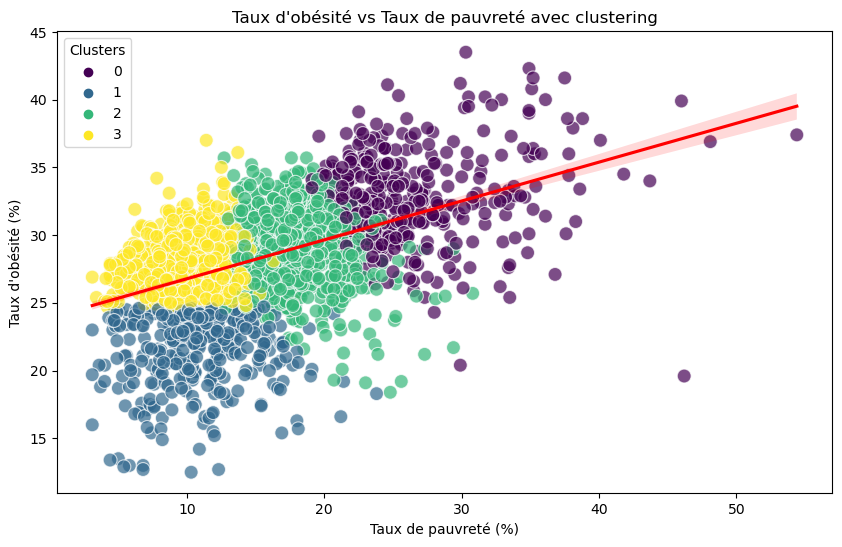

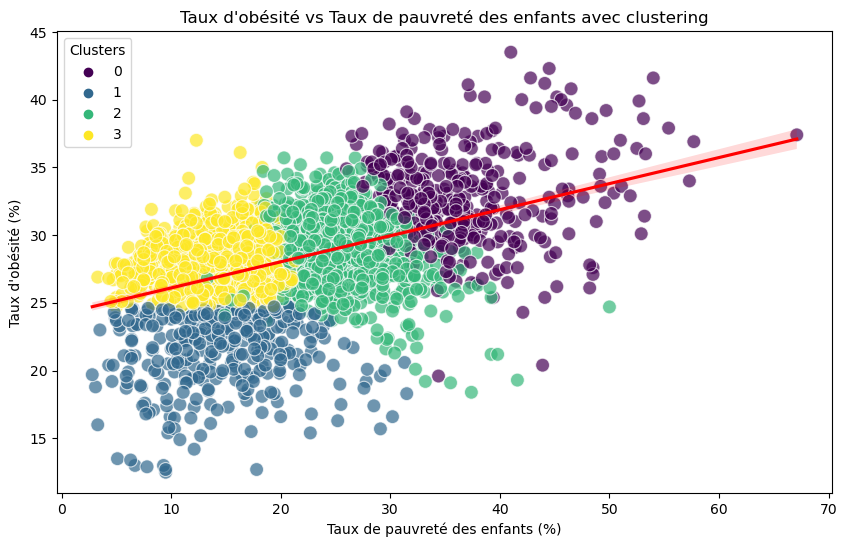

In [69]:
# Filtrage des colonnes nécessaires pour les visualisations
# Colonnes pour l'obésité et le diabète
cols_obesity_diabetes = ['Adult obesity rate', 'Adult diabetes rate']

# Colonnes pour l'obésité vs les mesures socio-économiques
cols_obesity_ethnicity = ['Adult obesity rate', '% White', '% Black', '% Hispanic', '% Asian']
cols_obesity_poverty = ['Adult obesity rate', 'Poverty rate', 'Child poverty rate']

# Fonction pour appliquer le clustering et ajouter les résultats au DataFrame
def apply_clustering(data, n_clusters=4):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    data['Cluster'] = clusters
    return data, scaler, kmeans

# 1. Taux d'obésité vs Taux de diabètes
data_diabetes = df[cols_obesity_diabetes].dropna()

# Application du clustering
data_diabetes, scaler_diabetes, kmeans_diabetes = apply_clustering(data_diabetes)

# Visualisation : Nuage de points avec courbe de tendance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_diabetes, x='Adult diabetes rate', y='Adult obesity rate', hue='Cluster', palette='viridis', s=100, alpha=0.7)
sns.regplot(data=data_diabetes, x='Adult diabetes rate', y='Adult obesity rate', scatter=False, color='red')
plt.title('Taux d\'obésité vs Taux de diabète avec clustering')
plt.xlabel('Taux de diabète (%)')
plt.ylabel('Taux d\'obésité (%)')
plt.legend(title='Clusters')
plt.show()

# 2. Taux d'obésité vs Catégories ethniques
data_ethnicity = df[cols_obesity_ethnicity].dropna()

# Application du clustering
data_ethnicity, scaler_ethnicity, kmeans_ethnicity = apply_clustering(data_ethnicity)

# Visualisation : Nuage de points avec courbe de tendance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_ethnicity, x='% White', y='Adult obesity rate', hue='Cluster', palette='viridis', s=100, alpha=0.7)
sns.regplot(data=data_ethnicity, x='% White', y='Adult obesity rate', scatter=False, color='red')
plt.title('Taux d\'obésité vs % White avec clustering')
plt.xlabel('% White')
plt.ylabel('Taux d\'obésité (%)')
plt.legend(title='Clusters')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_ethnicity, x='% Black', y='Adult obesity rate', hue='Cluster', palette='viridis', s=100, alpha=0.7)
sns.regplot(data=data_ethnicity, x='% Black', y='Adult obesity rate', scatter=False, color='red')
plt.title('Taux d\'obésité vs % Black avec clustering')
plt.xlabel('% Black')
plt.ylabel('Taux d\'obésité (%)')
plt.legend(title='Clusters')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_ethnicity, x='% Hispanic', y='Adult obesity rate', hue='Cluster', palette='viridis', s=100, alpha=0.7)
sns.regplot(data=data_ethnicity, x='% Hispanic', y='Adult obesity rate', scatter=False, color='red')
plt.title('Taux d\'obésité vs % Hispanic avec clustering')
plt.xlabel('% Hispanic')
plt.ylabel('Taux d\'obésité (%)')
plt.legend(title='Clusters')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_ethnicity, x='% Asian', y='Adult obesity rate', hue='Cluster', palette='viridis', s=100, alpha=0.7)
sns.regplot(data=data_ethnicity, x='% Asian', y='Adult obesity rate', scatter=False, color='red')
plt.title('Taux d\'obésité vs % Asian avec clustering')
plt.xlabel('% Asian')
plt.ylabel('Taux d\'obésité (%)')
plt.legend(title='Clusters')
plt.show()

# 3. Taux d'obésité vs Pauvreté et pauvreté des enfants
data_poverty = df[cols_obesity_poverty].dropna()

# Application du clustering
data_poverty, scaler_poverty, kmeans_poverty = apply_clustering(data_poverty)

# Visualisation : Nuage de points avec courbe de tendance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_poverty, x='Poverty rate', y='Adult obesity rate', hue='Cluster', palette='viridis', s=100, alpha=0.7)
sns.regplot(data=data_poverty, x='Poverty rate', y='Adult obesity rate', scatter=False, color='red')
plt.title('Taux d\'obésité vs Taux de pauvreté avec clustering')
plt.xlabel('Taux de pauvreté (%)')
plt.ylabel('Taux d\'obésité (%)')
plt.legend(title='Clusters')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_poverty, x='Child poverty rate', y='Adult obesity rate', hue='Cluster', palette='viridis', s=100, alpha=0.7)
sns.regplot(data=data_poverty, x='Child poverty rate', y='Adult obesity rate', scatter=False, color='red')
plt.title('Taux d\'obésité vs Taux de pauvreté des enfants avec clustering')
plt.xlabel('Taux de pauvreté des enfants (%)')
plt.ylabel('Taux d\'obésité (%)')
plt.legend(title='Clusters')
plt.show()

# Partie 4

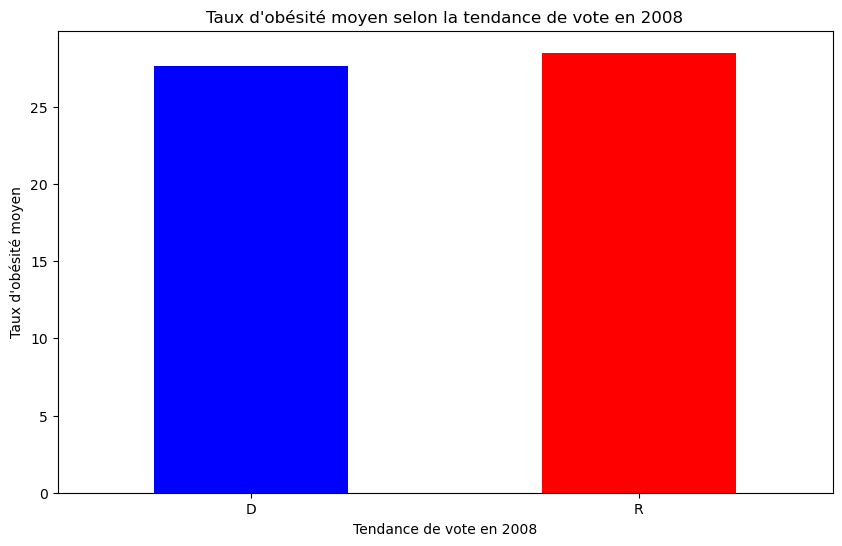

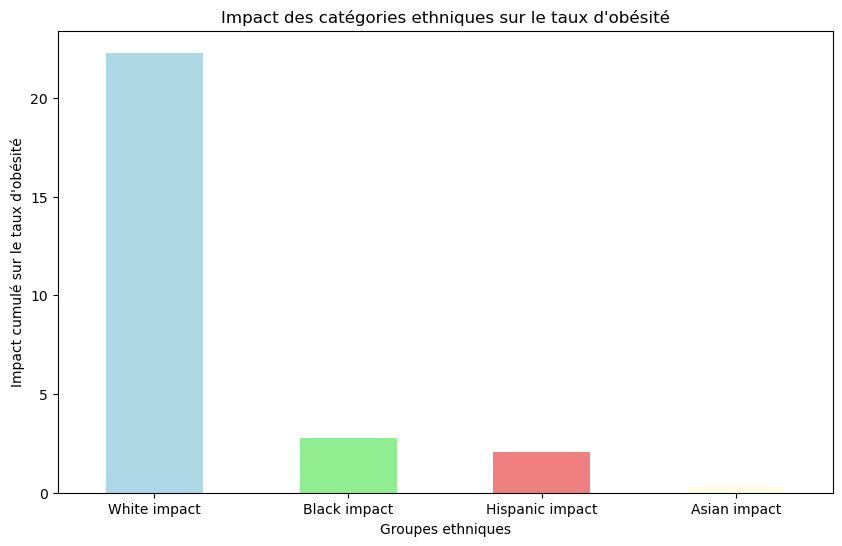

                White impact  Black impact  Hispanic impact  Asian impact
Voting in 2008                                                           
D                  19.242764      4.440005         2.364298      0.478597
R                  23.555636      2.143837         1.926189      0.183493


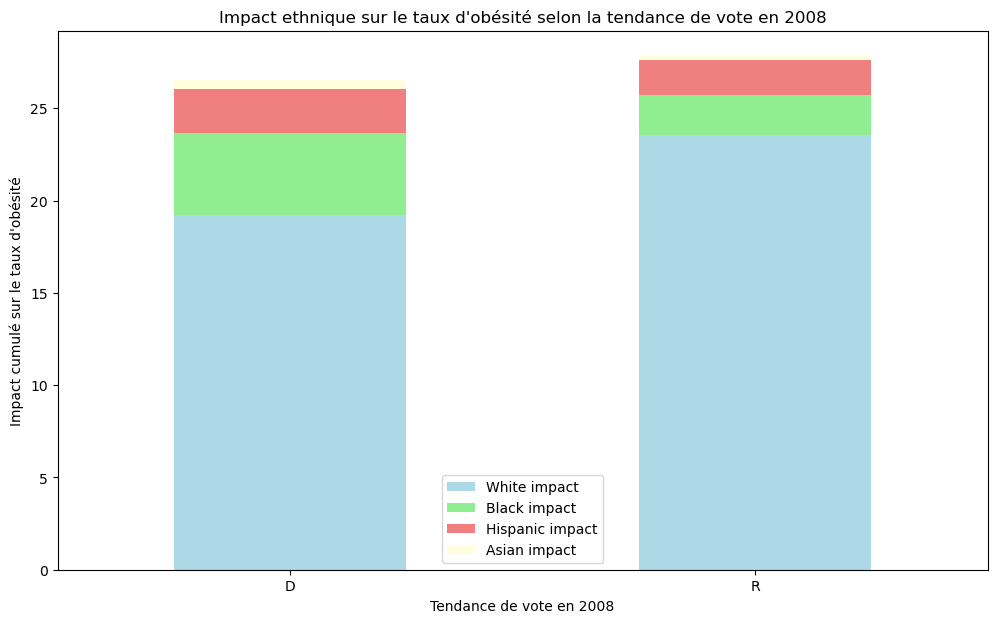

In [70]:
# Graphique en barres simples : Taux d'obésité vs Tendance de vote en 2008
# Supposons que la colonne 'Voting in 2008' contient les valeurs de vote (par exemple 'Obama' ou 'McCain')
plt.figure(figsize=(10, 6))
df.groupby('Voting in 2008')['Adult obesity rate'].mean().plot(kind='bar', color=['blue', 'red'])
plt.title('Taux d\'obésité moyen selon la tendance de vote en 2008')
plt.xlabel('Tendance de vote en 2008')
plt.ylabel('Taux d\'obésité moyen')
plt.xticks(rotation=0)
plt.show()

# Graphique en barres cumulées : Taux d'obésité et catégories ethniques
# Nous allons comparer l'impact des 4 catégories ethniques sur le taux d'obésité.
# Ajouter une nouvelle colonne pour calculer l'impact de chaque groupe ethnique
df['White impact'] = df['Adult obesity rate'] * df['% White'] / 100
df['Black impact'] = df['Adult obesity rate'] * df['% Black'] / 100
df['Hispanic impact'] = df['Adult obesity rate'] * df['% Hispanic'] / 100
df['Asian impact'] = df['Adult obesity rate'] * df['% Asian'] / 100

# Calculer les moyennes des impacts ethniques
ethnic_impact = df[['White impact', 'Black impact', 'Hispanic impact', 'Asian impact']].mean()

# Affichage du graphique en barres cumulées
ethnic_impact.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Impact des catégories ethniques sur le taux d\'obésité')
plt.xlabel('Groupes ethniques')
plt.ylabel('Impact cumulé sur le taux d\'obésité')
plt.xticks(rotation=0)
plt.show()

# Analyse des tendances : comparaison des résultats de vote et de l'impact ethnique sur l'obésité
# Nous allons maintenant comparer les taux d'obésité en fonction du vote en 2008 et des impacts ethniques.
# Créer un tableau qui montre l'impact des groupes ethniques en fonction de la tendance de vote.

vote_ethnic_impact = df.groupby('Voting in 2008')[['White impact', 'Black impact', 'Hispanic impact', 'Asian impact']].mean()

# Afficher la table
print(vote_ethnic_impact)

# Graphique pour visualiser l'impact ethnique en fonction de la tendance de vote en 2008
vote_ethnic_impact.plot(kind='bar', stacked=True, figsize=(12, 7), color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Impact ethnique sur le taux d\'obésité selon la tendance de vote en 2008')
plt.xlabel('Tendance de vote en 2008')
plt.ylabel('Impact cumulé sur le taux d\'obésité')
plt.xticks(rotation=0)
plt.show()